# -----------------------   TOURIST PREDICTION USING ARIMA  ----------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings('ignore')

In [2]:
tourist = pd.read_csv("open_new_iit.csv")

In [3]:
tourist.head(2)

,Timestamp,Hotels in shimla 0lag,budget hotels 0lag,Travel guide 0lag,weather shimla: (Worldwide) 0lag,Shimla Airport 0lag,train shimla: (Worldwide) 0lag,Shimla maps: (Worldwide) 0lag,No of Tourist(I 0lag,Foreign Tourist 0lag,...,Shimla flights: (Worldwide),train shimla: (Worldwide),Shimla Airport,Shopping Shimla,Shimla maps: (Worldwide),Shimla to manali: (Worldwide),No of Tourist(I,Foreign Tourist,SUM,SUM scaled
0,01-01-2010,37,41,92,3,9,19,46,155554,6306,...,31,14,6,26,64,16,165247,7065,172312,17.2312
1,01-02-2010,63,86,97,3,14,21,37,176551,12410,...,16,19,9,0,46,13,155554,6306,161860,16.1860


In [4]:
df = tourist[['Timestamp', 'SUM']]

In [5]:
df.head(2)

,Timestamp,SUM
0,01-01-2010,172312
1,01-02-2010,161860


In [6]:
df.isnull().sum()

Timestamp    0
SUM          0
dtype: int64

In [7]:
format_str = '%d-%m-%Y'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format=format_str)
print(df['Timestamp'].dtypes)

datetime64[ns]


In [8]:
df.set_index('Timestamp',inplace=True)
df.head()

,SUM
Timestamp,
2010-01-01,172312
2010-02-01,161860
2010-03-01,188961
2010-04-01,363600
2010-05-01,369630


In [9]:
df.index.dtype

dtype('<M8[ns]')

In [10]:
df.index.dtype

dtype('<M8[ns]')

In [11]:
df["Tourist"] = df['SUM']
df = df.drop('SUM', axis=1, inplace=False)

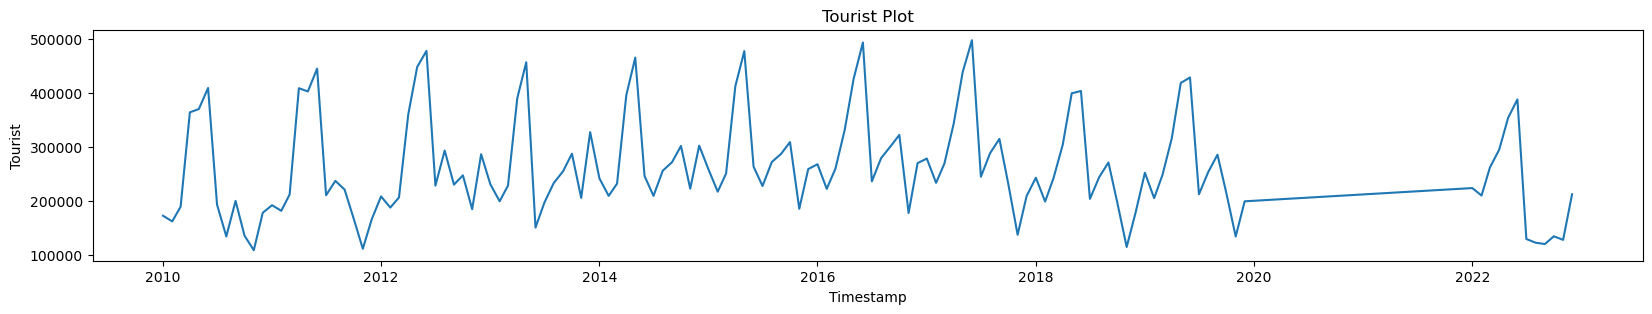

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(df.index, df['Tourist'])  # Create a line plot
plt.xlabel('Timestamp')  # Add labels for x and y axes
plt.ylabel('Tourist')
plt.title('Tourist Plot')  # Add a title
plt.show()  # Display the plot

In [13]:
def adfuller_test(No_of_Tourist):
    #performing the Augmented Dickey-Fuller (ADF) unit root test on time series data.
    result = adfuller(No_of_Tourist)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical values', 'Test statistic']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Tourist'])

ADF Test Statistic : -1.710089535880996
p-value : 0.4259216854147706
#Lags Used : 13
Number of Observations Used : 118
Critical values : {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Test statistic : 2903.1217158282384
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


ADF statistic is negative, which is a good initial sign. A more negative value suggests stronger evidence against a unit root (non-stationarity).
This p-value is relatively high (greater than 0.05, a common significance level). At this level, we cannot reject the null hypothesis of a unit root based solely on the p-value.
This indicates that the ADF test used 13 lagged terms in the regression to account for potential autocorrelation in the data.
{'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
These values represent the critical thresholds for the ADF statistic at different significance levels (1%, 5%, and 10%).
Test statistic (again): 2903.1217158282384 (This seems to be redundant information)

High p-value (0.425): The p-value is a statistical measure used to assess the significance of the ADF statistic. In your case, the p-value is greater than 0.05 (a common significance level). This means we cannot reject the null hypothesis (presence of a unit root, indicating non-stationarity) at the 5% significance level.

Negative ADF statistic (-1.710): While negative, the absolute value of the statistic isn't very strong. More negative values would provide stronger evidence against a unit root (non-stationarity).

As I am not sure about the data stationary or not I will try Differencing and re-testing

In [15]:
df['First Difference'] = df['Tourist'] - df['Tourist'].shift(1)

In [16]:
df['Seasonal First Difference']=df['Tourist']-df['Tourist'].shift(12)

In [17]:
df.head(15)

,Tourist,First Difference,Seasonal First Difference
Timestamp,,,
2010-01-01,172312,NaN,NaN
2010-02-01,161860,-10452.0,NaN
2010-03-01,188961,27101.0,NaN
2010-04-01,363600,174639.0,NaN
2010-05-01,369630,6030.0,NaN
2010-06-01,408653,39023.0,NaN
2010-07-01,192791,-215862.0,NaN
2010-08-01,134041,-58750.0,NaN
2010-09-01,199807,65766.0,NaN


In [18]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.572696948673637
p-value : 2.813837297710998e-11
#Lags Used : 0
Number of Observations Used : 119
Critical values : {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}
Test statistic : 2611.8679319100315
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Timestamp'>

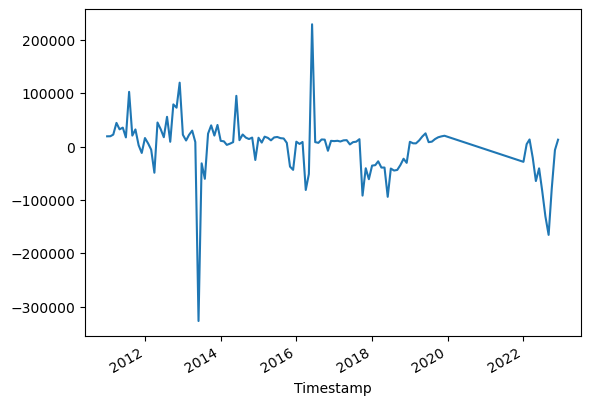

In [19]:
df['Seasonal First Difference'].plot()

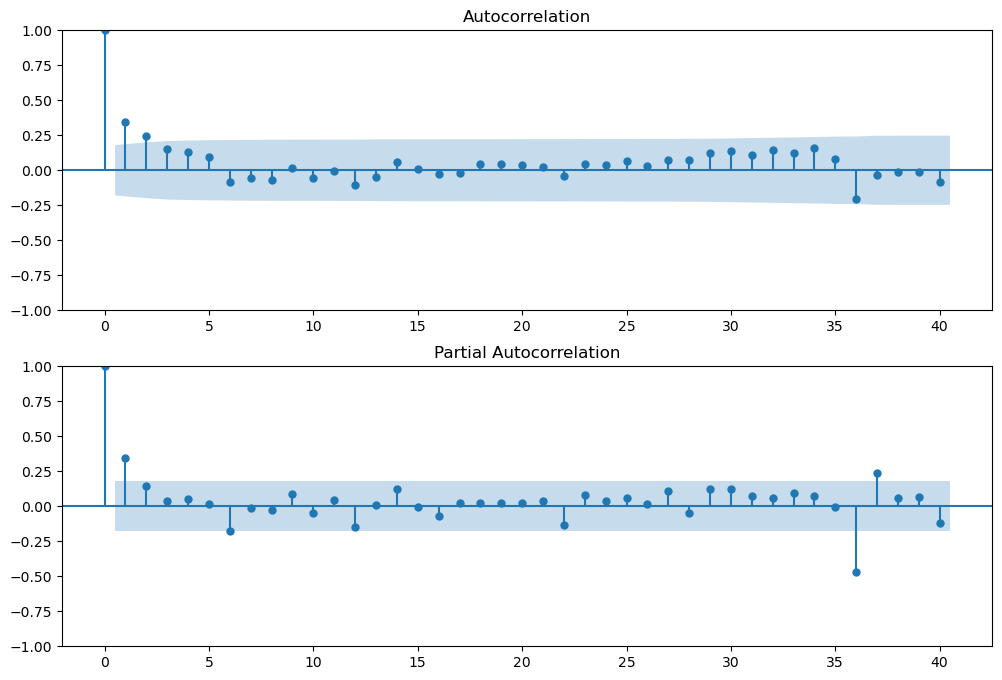

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [21]:
#Significant spikes at specific lags in the ACF plot indicate that the data is correlated with itself at those time intervals.
#Significant spikes at specific lags in the PACF plot indicate that the data has a direct correlation with itself at those lags, independent of correlations at earlier lags.

Your data likely exhibits some short-term dependencies, where past values (especially the most recent ones) influence future values.
An ARIMA model with an AR term of order 1 (AR(1)) might be a good starting point for forecasting future values in your time series

In [22]:
model=sm.tsa.statespace.SARIMAX(df['Tourist'],order=(2,1,9),seasonal_order=(2,1,9,12))
results=model.fit()

In [23]:
x = 100
y = 131
df['forecast'] = results.predict (start=x, end=y,dynamic=True)

In [24]:
def accuracy(start_index, end_index):
    accs = []
    for i in range(start_index, end_index):
        tourist_value = df["Tourist"].iloc[i]
        forecast_value = df["forecast"].iloc[i]
        acc = (1- (abs(tourist_value - forecast_value) / tourist_value)) * 100
        accs.append(acc)
    #calculating mean
    mean_value = sum(accs) / len(accs)  
    # Find maximum
    max_value = max(accs)
    # Find minimum
    min_value = min(accs)
    print("Mean:", mean_value)
    print("Max: ", max_value)
    return 0

In [25]:
average_accuracy = accuracy(x, y)

Mean: 83.67336372928551
Max:  99.90877603876773


<Axes: xlabel='Timestamp'>

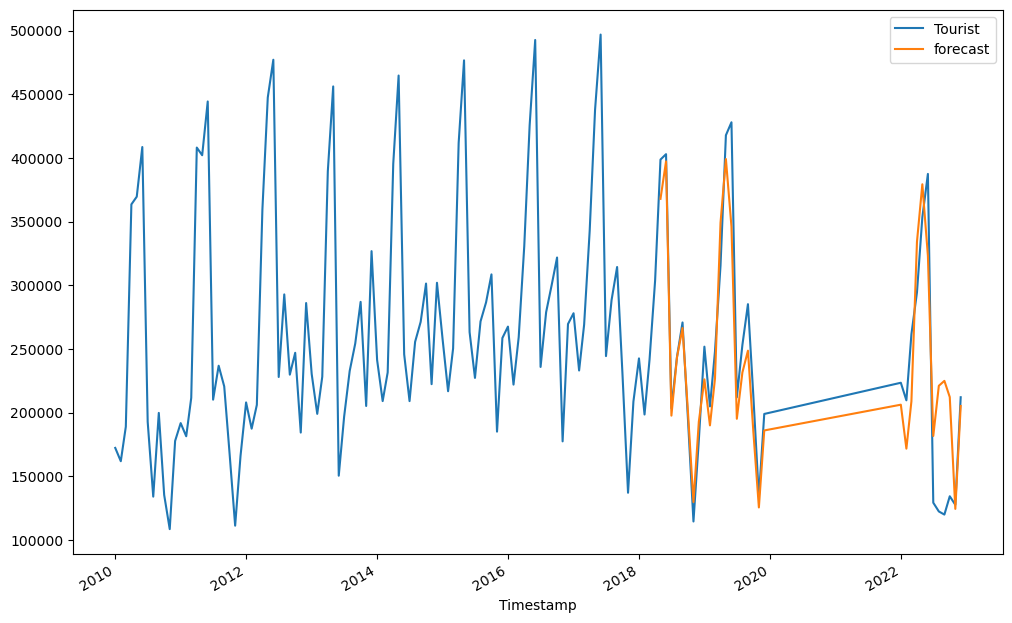

In [26]:
df[['Tourist','forecast']].plot(figsize=(12,8))

### Future data

In [27]:
from pandas.tseries.offsets import DateOffset

In [28]:
type(df.index[-1])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
from pandas.tseries.offsets import MonthEnd

# Assuming your DataFrame is named 'df'

# Get the last date index from 'df'
last_date = df.index[-1]

# Generate list of future dates with monthly gaps (24 months)
future_dates = [last_date + DateOffset(months=i+1) for i in range(24)] 

# Create a new empty DataFrame with the desired index
future_df = pd.DataFrame(index=future_dates, columns=df.columns)  # All columns from 'df'


In [30]:
future_df.head(30)

,Tourist,First Difference,Seasonal First Difference,forecast
2023-01-01,NaN,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN


In [31]:
future_df=pd.concat([df,future_df])

In [32]:
future_df.shape

(156, 4)

In [33]:
future_df.tail(30)

,Tourist,First Difference,Seasonal First Difference,forecast
2022-07-01,129273,-258245.0,-82757.0,181695.371522
2022-08-01,122404,-6869.0,-130723.0,221116.787662
2022-09-01,119936,-2468.0,-165277.0,224963.500406
2022-10-01,134331,14395.0,-78983.0,212228.141041
2022-11-01,127651,-6680.0,-6234.0,124408.084676
2022-12-01,212113,84462.0,13128.0,205255.779636
2023-01-01,NaN,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN


<Axes: xlabel='Timestamp'>

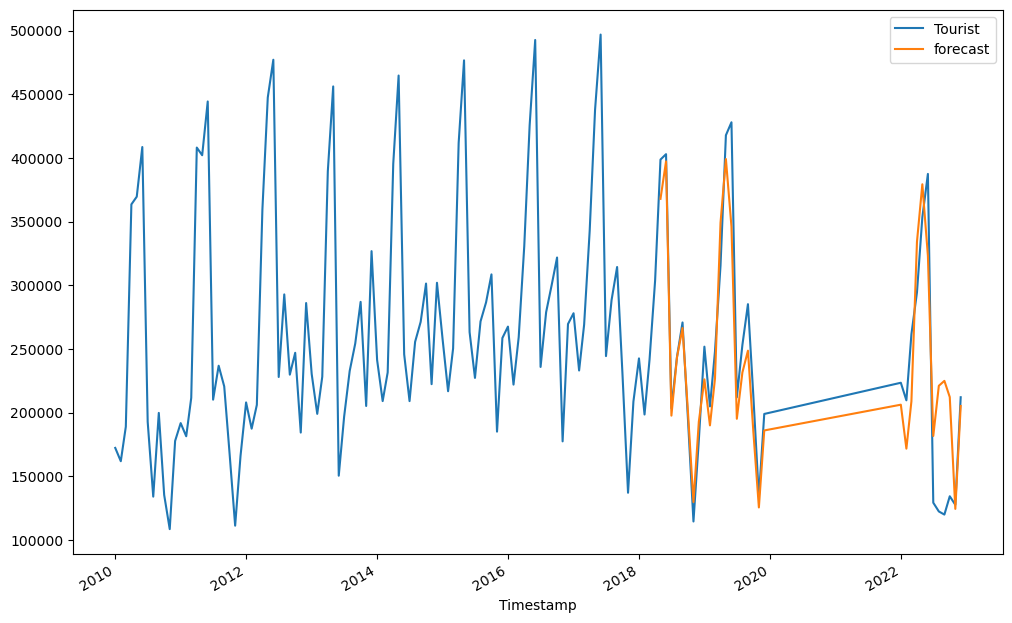

In [34]:
df['forecast'] = results.predict (start=100, end=131,dynamic=True)
df[['Tourist','forecast']].plot(figsize=(12,8))